<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [4]:
!pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 175.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 176.6 MB/s eta 0:00:00


In [5]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 141.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 139.1 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [6]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-07-09 01:27:02--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  37.4MB/s    in 3.7s    

2025-07-09 01:27:06 (41.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')
# Load the data
df = pd.read_csv("survey-data.csv")

#### Load the data


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


In [10]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [41]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [14]:
df.columns.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [11]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


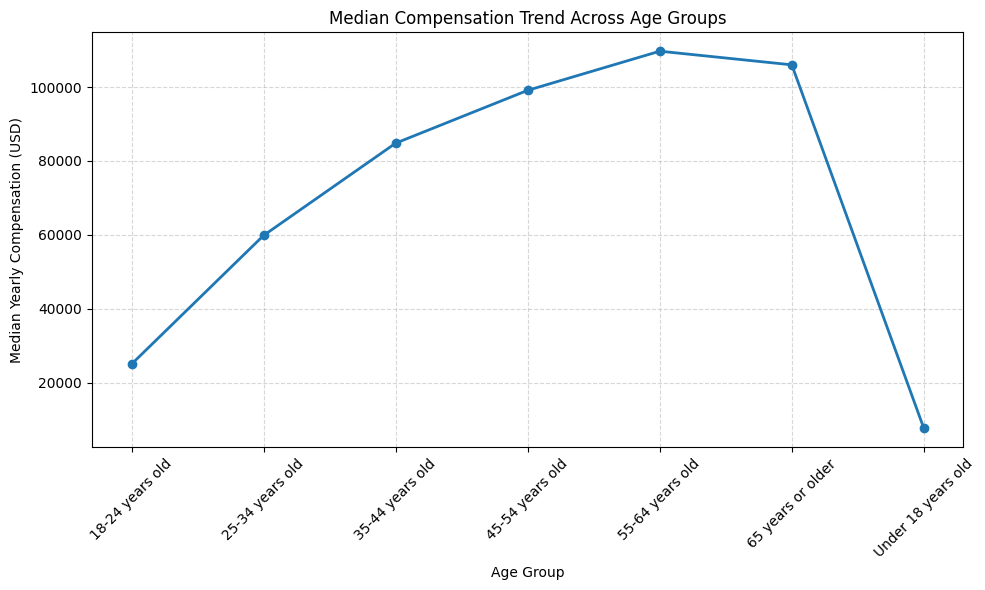

In [43]:
query = """WITH Cleaned AS (
    SELECT 
        Age,
        ConvertedCompYearly
    FROM main
    WHERE 
        Age IS NOT NULL AND 
        Age != 'Prefer not to say' AND 
        ConvertedCompYearly IS NOT NULL
),
Ranked AS (
    SELECT 
        Age,
        ConvertedCompYearly,
        ROW_NUMBER() OVER (PARTITION BY Age ORDER BY ConvertedCompYearly) AS rn,
        COUNT(*) OVER (PARTITION BY Age) AS total
    FROM Cleaned
)
SELECT 
    Age,
    AVG(CASE WHEN rn IN ((total + 1)/2, (total + 2)/2) THEN ConvertedCompYearly END) AS Median_ConvertedCompYearly
FROM Ranked
GROUP BY Age
ORDER BY Age;"""
df_comp_trend = pd.read_sql_query(query, conn)
plt.figure(figsize=(10, 6))
plt.plot(df_comp_trend["Age"], df_comp_trend["Median_ConvertedCompYearly"], marker='o', color="#1f77b4", linewidth=2)

plt.title("Median Compensation Trend Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Median Yearly Compensation (USD)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


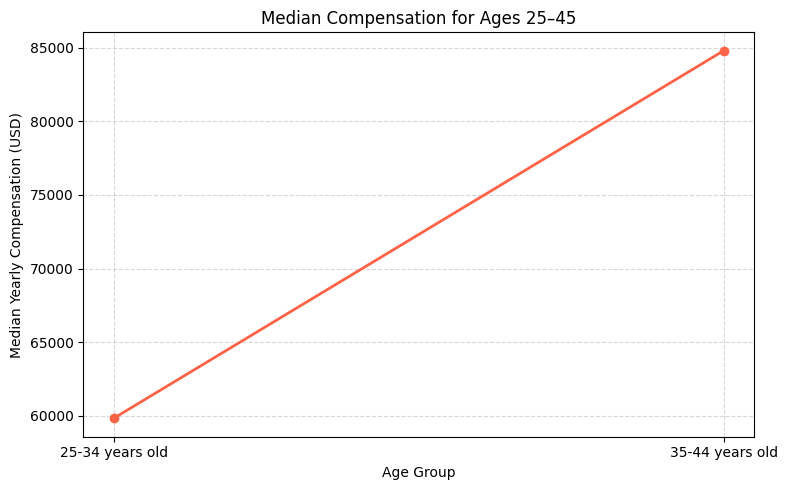

In [32]:
query = """WITH Cleaned AS (
    SELECT 
        Age,
        ConvertedCompYearly
    FROM main
    WHERE 
        Age IN ('25-34 years old', '35-44 years old') AND 
        ConvertedCompYearly IS NOT NULL
),
Ranked AS (
    SELECT 
        Age,
        ConvertedCompYearly,
        ROW_NUMBER() OVER (PARTITION BY Age ORDER BY ConvertedCompYearly) AS rn,
        COUNT(*) OVER (PARTITION BY Age) AS total
    FROM Cleaned
)
SELECT 
    Age,
    AVG(CASE WHEN rn IN ((total + 1)/2, (total + 2)/2) THEN ConvertedCompYearly END) AS Median_ConvertedCompYearly
FROM Ranked
GROUP BY Age
ORDER BY Age;"""
df_zoomed = pd.read_sql_query(query, conn)

# Line chart
plt.figure(figsize=(8, 5))
plt.plot(df_zoomed["Age"], df_zoomed["Median_ConvertedCompYearly"], marker='o', color="#ff6347", linewidth=2)

plt.title("Median Compensation for Ages 25–45")
plt.xlabel("Age Group")
plt.ylabel("Median Yearly Compensation (USD)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


In [47]:
print(df_exp["ExperienceGroup"].unique())

['10–14' '15–19' '1–4' '5–9' '<1' 'Other']


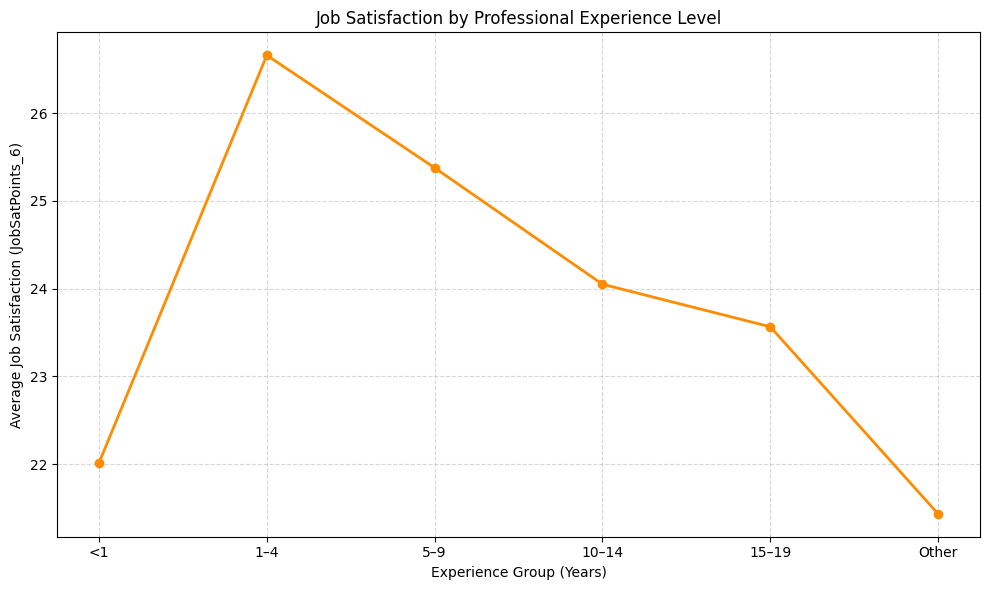

In [48]:
query = """SELECT 
    CASE
        WHEN YearsCodePro IN ('Less than 1 year') THEN '<1'
        WHEN YearsCodePro IN ('1', '2', '3', '4') THEN '1–4'
        WHEN YearsCodePro IN ('5', '6', '7', '8', '9') THEN '5–9'
        WHEN YearsCodePro IN ('10', '11', '12', '13', '14') THEN '10–14'
        WHEN YearsCodePro IN ('15', '16', '17', '18', '19') THEN '15–19'
        WHEN YearsCodePro IN ('20 or more years') THEN '20+'
        ELSE 'Other'
    END AS ExperienceGroup,
    AVG(JobSatPoints_6) AS AvgJobSatisfaction
FROM main
WHERE 
    JobSatPoints_6 IS NOT NULL AND 
    YearsCodePro IS NOT NULL AND 
    YearsCodePro != 'NA'
GROUP BY ExperienceGroup
ORDER BY ExperienceGroup"""
df_exp = pd.read_sql_query(query, conn)

# Sort experience groups manually for correct order
available_groups = ['<1', '1–4', '5–9', '10–14', '15–19', 'Other']  # Adjusted list from your data
df_exp = df_exp.set_index("ExperienceGroup").loc[available_groups].reset_index()
# Line chart
plt.figure(figsize=(10, 6))
plt.plot(df_exp["ExperienceGroup"], df_exp["AvgJobSatisfaction"], marker='o', color="#ff8c00", linewidth=2)

plt.title("Job Satisfaction by Professional Experience Level")
plt.xlabel("Experience Group (Years)")
plt.ylabel("Average Job Satisfaction (JobSatPoints_6)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Task 3: Trends in Job Satisfaction and Compensation by Experience


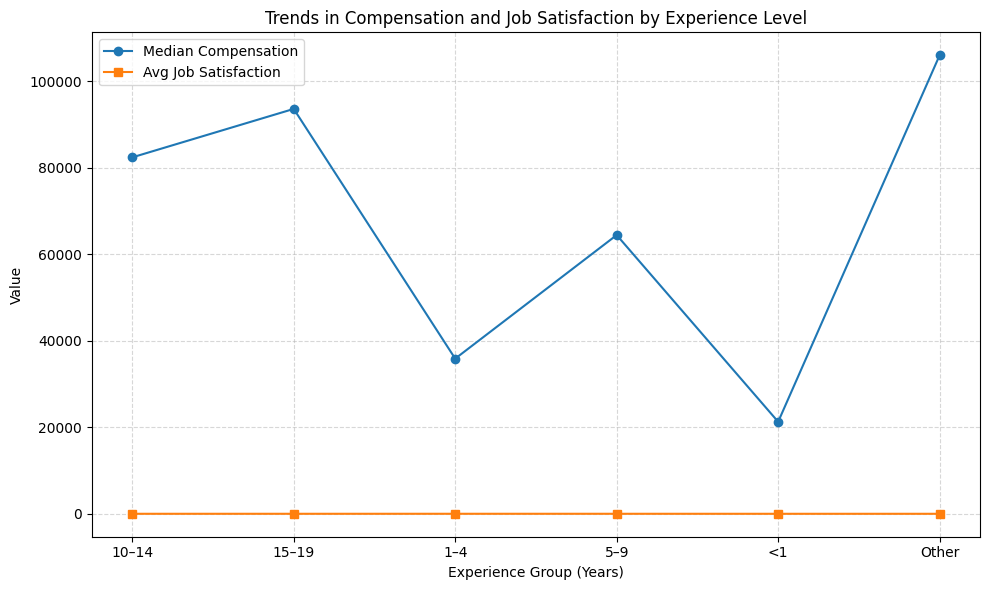

In [51]:
query_comp = """
WITH Cleaned AS (
    SELECT YearsCodePro, ConvertedCompYearly
    FROM main
    WHERE YearsCodePro IS NOT NULL AND ConvertedCompYearly IS NOT NULL
),
Grouped AS (
    SELECT 
        CASE
            WHEN YearsCodePro IN ('Less than 1 year') THEN '<1'
            WHEN YearsCodePro IN ('1','2','3','4') THEN '1–4'
            WHEN YearsCodePro IN ('5','6','7','8','9') THEN '5–9'
            WHEN YearsCodePro IN ('10','11','12','13','14') THEN '10–14'
            WHEN YearsCodePro IN ('15','16','17','18','19') THEN '15–19'
            WHEN YearsCodePro = '20 or more years' THEN '20+'
            ELSE 'Other'
        END AS ExperienceGroup,
        ConvertedCompYearly
    FROM Cleaned
),
Ranked AS (
    SELECT 
        ExperienceGroup,
        ConvertedCompYearly,
        ROW_NUMBER() OVER (PARTITION BY ExperienceGroup ORDER BY ConvertedCompYearly) AS rn,
        COUNT(*) OVER (PARTITION BY ExperienceGroup) AS total
    FROM Grouped
)
SELECT 
    ExperienceGroup,
    AVG(CASE WHEN rn IN ((total + 1)/2, (total + 2)/2) THEN ConvertedCompYearly END) AS MedianCompensation
FROM Ranked
GROUP BY ExperienceGroup
ORDER BY ExperienceGroup;
"""
df_comp = pd.read_sql_query(query_comp, conn)
query_sat = """
SELECT 
    CASE
        WHEN YearsCodePro IN ('Less than 1 year') THEN '<1'
        WHEN YearsCodePro IN ('1','2','3','4') THEN '1–4'
        WHEN YearsCodePro IN ('5','6','7','8','9') THEN '5–9'
        WHEN YearsCodePro IN ('10','11','12','13','14') THEN '10–14'
        WHEN YearsCodePro IN ('15','16','17','18','19') THEN '15–19'
        WHEN YearsCodePro = '20 or more years' THEN '20+'
        ELSE 'Other'
    END AS ExperienceGroup,
    AVG(JobSatPoints_6) AS AvgSatisfaction
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND YearsCodePro IS NOT NULL
GROUP BY ExperienceGroup
ORDER BY ExperienceGroup;
"""

df_sat = pd.read_sql_query(query_sat, conn)

df_merged = pd.merge(df_comp, df_sat, on="ExperienceGroup")

plt.figure(figsize=(10, 6))
plt.plot(df_merged["ExperienceGroup"], df_merged["MedianCompensation"], marker='o', label="Median Compensation", color="#1f77b4")
plt.plot(df_merged["ExperienceGroup"], df_merged["AvgSatisfaction"], marker='s', label="Avg Job Satisfaction", color="#ff7f0e")

plt.title("Trends in Compensation and Job Satisfaction by Experience Level")
plt.xlabel("Experience Group (Years)")
plt.ylabel("Value")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


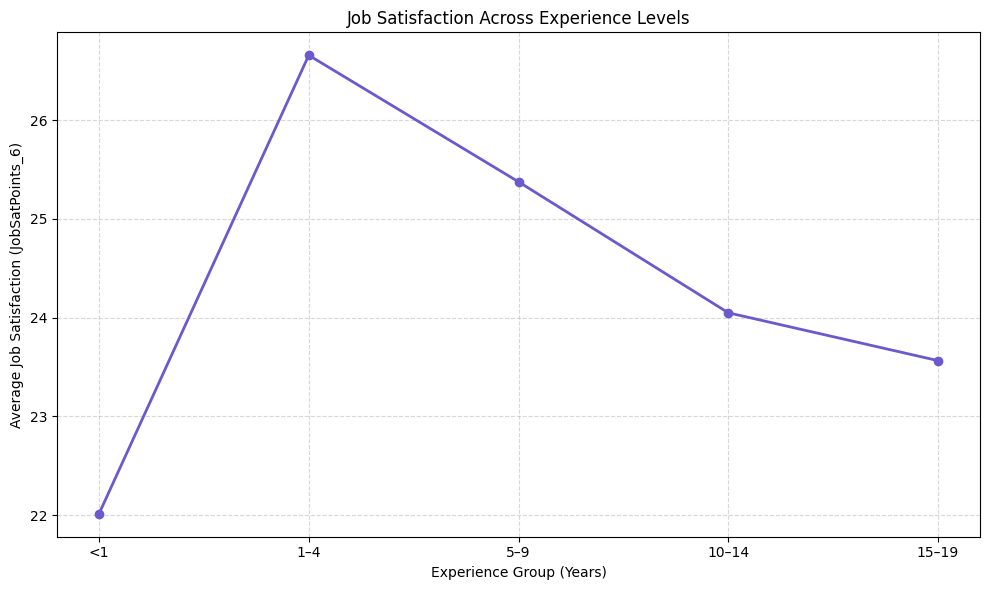

In [16]:
exp_bins = {
    'Less than 1 year': '<1',
    '1': '1–4', '2': '1–4', '3': '1–4', '4': '1–4',
    '5': '5–9', '6': '5–9', '7': '5–9', '8': '5–9', '9': '5–9',
    '10': '10–14', '11': '10–14', '12': '10–14', '13': '10–14', '14': '10–14',
    '15': '15–19', '16': '15–19', '17': '15–19', '18': '15–19', '19': '15–19',
    '20 or more years': '20+'
}
query = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Map experience to buckets
df["ExperienceGroup"] = df["YearsCodePro"].map(exp_bins)

# Drop rows with unmapped experience
df = df[df["ExperienceGroup"].notnull()]
df_grouped = df.groupby("ExperienceGroup")["JobSatPoints_6"].mean().reset_index()
exp_order = ['<1', '1–4', '5–9', '10–14', '15–19']
df_grouped = df_grouped.set_index("ExperienceGroup").loc[exp_order].reset_index()
plt.figure(figsize=(10, 6))
plt.plot(df_grouped["ExperienceGroup"], df_grouped["JobSatPoints_6"], marker='o', color="#6a5acd", linewidth=2)

plt.title("Job Satisfaction Across Experience Levels")
plt.xlabel("Experience Group (Years)")
plt.ylabel("Average Job Satisfaction (JobSatPoints_6)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [19]:
conn.close()

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
